Lowest risk
Return           0.114726
Risk             0.142798
Sharpe           0.803411
Weights    [0.521, 0.479]
Name: 132, dtype: object
['^NSEI', '^GSPC']

Highest return
Return       0.127842
Risk         0.173395
Sharpe       0.737286
Weights    [1.0, 0.0]
Name: 7589, dtype: object
['^NSEI', '^GSPC']

Highest sharpe
Return           0.117875
Risk             0.144743
Sharpe           0.814374
Weights    [0.636, 0.364]
Name: 750, dtype: object
['^NSEI', '^GSPC']



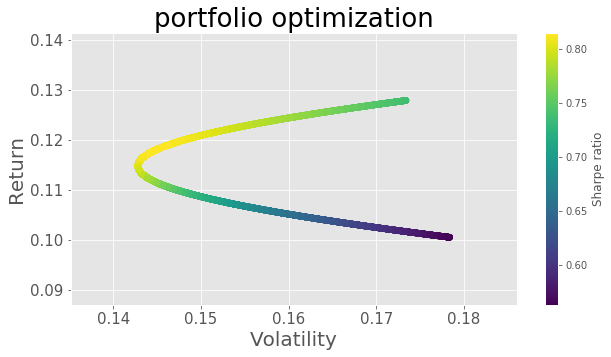

In [18]:
#pip install yahoo-finance
#pip install yfinance
#conda install pandas-datareader
#libraries import
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
from matplotlib import style

style.use('ggplot')

number_of_portfolios = 25000
#tickers = ['META','AAPL','AMZN','NFLX','GOOG']
tickers = ['^NSEI','^GSPC']
#tickers = ['^URTH-TC']

start = dt.datetime(2014,1,1)
end = dt.datetime(2022,6,30)

returnsn = pd.DataFrame()
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data = pd.DataFrame(data)
    data[ticker] = data['Adj Close'].pct_change()
    
    if returnsn.empty:
        returnsn = data[[ticker]]
    else:
        returnsn = returnsn.join(data[[ticker]], how = 'outer')
        

RF = 0
portfolio_returns = []
portfolio_risks = []
portfolio_weights = []
sharpe_ratios = []

for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights/np.sum(weights)),3)
    portfolio_weights.append(weights)
    #calculate annualized returns
    annualized_return = np.sum(returnsn.mean() * weights) * 252
    portfolio_returns.append(annualized_return)
    #Matrix covariance and Portfolio risk calculation
    matrix_covariance = returnsn.cov() * 252
    portfolio_variance = np.dot(weights.T,
                                np.dot(matrix_covariance, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_standard_deviation)
    #sharpe ratio
    sharpe_ratio = (annualized_return - RF) / portfolio_standard_deviation
    sharpe_ratios.append(sharpe_ratio)
    

portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)
sharpe_ratios = np.array(sharpe_ratios)

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]

portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return','Risk','Sharpe','Weights']

min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]

print('Lowest risk')
print(min_risk)
print(tickers)
print('')

print('Highest return')
print(highest_return)
print(tickers)
print('')

print('Highest sharpe')
print(highest_sharpe)
print(tickers)
print('')

#visualization
plt.figure(figsize= (10,5))
plt.scatter(portfolio_risks, portfolio_returns,
            c  = portfolio_returns / portfolio_risks)
plt.title('portfolio optimization', fontsize = 26)
plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe ratio')
plt.show()
